# Car Price Prediction

In [1]:
# Importing libraries :
import pandas as pd 
import numpy as np
import seaborn as sb

In [2]:
# Reading Dataset :
df = pd.read_csv("car data.csv")

In [3]:
# Top 5 Records :
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Shape of dataset :
df.shape

(301, 9)

In [5]:
# Description of dataset :
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Data-types of each columns :
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [7]:
print(df["Seller_Type"].unique())

['Dealer' 'Individual']


In [8]:
print(df["Transmission"].unique())

['Manual' 'Automatic']


In [9]:
print(df["Owner"].unique())

[0 1 3]


In [10]:
print(df["Fuel_Type"].unique())

['Petrol' 'Diesel' 'CNG']


In [11]:
# Cheaking missing values :
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# Columns :
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
# Taking only Importing feature :
data = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [14]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
# Creating Current Year Column :
data["Current_Year"] = 2020

In [16]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [17]:
# Creating New Column :
data["No_Years"] = data["Current_Year"] - data["Year"]

In [18]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [19]:
# Dropping Unnecessary Columns :
data.drop(["Year","Current_Year"], axis=1, inplace=True)

In [20]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [21]:
# OneHotCoding :
data = pd.get_dummies(data, drop_first=True)

In [22]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [23]:
# Corelation :
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


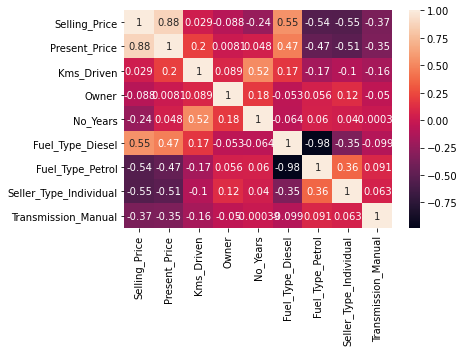

In [24]:
# Heatmap :
sb.heatmap(data.corr(), annot=True)

In [25]:
# Dependent & Independent Feature :
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [26]:
x.head()

,Present_Price,Kms_Driven,Owner,No_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
# Cheaking Which Feature is important :
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)

[0.38630969 0.04285634 0.00130252 0.07369519 0.21561006 0.0100187
 0.1371061  0.1331014 ]


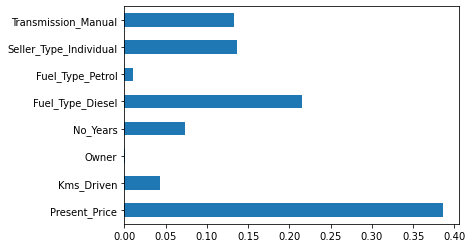

In [30]:
# Plotting graph of feature importance for better visualization :
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.plot(kind="barh")

In [31]:
# Train Test Split :
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


In [33]:
# RandomForestRegressor :
from sklearn.ensemble import RandomForestRegressor
RanForReg = RandomForestRegressor()

In [34]:
# HyperParameter :

# 1. Number of Trees in Random Forest:
n_estimators = [int(x) for x in np.linspace(100,1500,15)]
print(n_estimators)

# 2. Number of feature to consider at every split :
max_features = ['auto', 'sqrt']
print(max_features)

# 3. Maximum number of levels in tree :
max_depth = [int(x) for x in np.linspace(5,50,10)]
print(max_depth)

# 4. Minimum number of sample required to split a node :
min_samples_split = [2,5,10,15,30,50,100]
print(min_samples_split)

# 5. Minimum number of sample required at leaf node :
min_samples_leaf = [1,2,5,10]
print(min_samples_leaf)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
['auto', 'sqrt']
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
[2, 5, 10, 15, 30, 50, 100]
[1, 2, 5, 10]


In [35]:
# Create Random grid :
Random_grid = {"n_estimators" : n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split,
              "min_samples_leaf" : min_samples_leaf}
print(Random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'min_samples_split': [2, 5, 10, 15, 30, 50, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
# RandomizedSearchCV :
from sklearn.model_selection import RandomizedSearchCV

In [37]:
RanSerCV = RandomizedSearchCV(estimator=RanForReg, param_distributions=Random_grid, scoring="neg_mean_squared_error", 
                              n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [38]:
RanSerCV.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45, total=   3.1s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45, total=   3.0s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45, total=   3.0s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45, total=   3.0s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=45, total=   3.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=600, min_samples_split=5, m

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, total=   3.8s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, total=   3.9s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, total=   3.8s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, total=   3.9s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, total=   3.8s
[CV] n_estimators=1300, min_samples_split=5

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              50, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
# Predictions :
y_pred = RanSerCV.predict(x_test)

In [40]:
print(y_pred)

[ 0.644892    9.60649768  2.36983717  0.20285115  3.24439784  4.51359998
 15.38207706  7.26867185  3.84161446  1.14439091  5.71922671 11.6212697
  1.98624572  5.09113885  0.23656777  1.14565848  7.81038862  0.85916514
  4.0759407   8.53573454  0.44538908  0.33362919  5.33126579 17.94487127
  3.62628447  4.95634333  9.37431439 17.72490681  2.96723638  5.26936252
  0.41833741  0.55339175  4.21431411  2.82893349  0.57286549  0.32479203
 15.85121746  4.4279805   3.89901869  4.20928745 20.76032594  1.49803418
  3.96896809  0.30187506  0.45831339  5.83563151  4.77290458  2.81228863
  1.52460165 20.62033203  7.47962877  5.29464617  1.18428346  2.63733484
  0.49058246  2.77781536  4.5307513   0.56087383  4.53573215  4.7992823
 18.43328046]


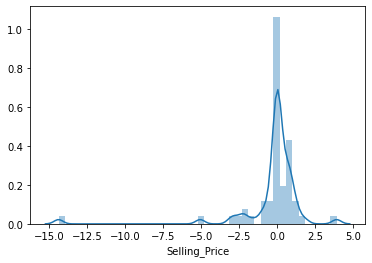

In [41]:
sb.distplot(y_pred-y_test)

In [42]:
# Creating pickle file :
import pickle 

# Open a file, Where we want to store file :
file = open("Car_Price_Pred_Model.pkl", "wb")
# Dumping Information :
pickle.dump(RanSerCV, file)